In [1]:
from google.colab import files

fp = files.upload()

Saving samsung.csv to samsung.csv


In [2]:
import pandas as pd

df = pd.read_csv('samsung.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4719.226074,74195000.0
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4309.866211,74680000.0
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4340.761230,54390000.0
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4278.971680,40305000.0
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4456.618652,46880000.0


In [3]:
df['3MA'] = df['Adj Close'].rolling(window=3).mean()
df['5MA'] = df['Adj Close'].rolling(window=5).mean()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4719.226074,74195000.0,NaN,NaN
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4309.866211,74680000.0,NaN,NaN
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4340.761230,54390000.0,4456.617838,NaN
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4278.971680,40305000.0,4309.866374,NaN
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4456.618652,46880000.0,4358.783854,4421.088769


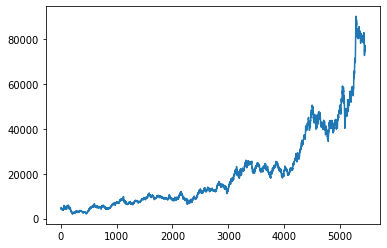

In [4]:
import matplotlib.pyplot as plt

plt.plot(df['Adj Close'])
plt.show()

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
count,5445.000000,5445.000000,5445.000000,5445.000000,5445.000000,5.445000e+03,5431.000000,5417.000000
mean,23376.247934,23620.655647,23130.282828,23375.002755,20435.483793,2.202761e+07,20384.731300,20334.357783
std,18524.540016,18692.955023,18359.082868,18518.020280,18151.271864,1.559318e+07,18117.282098,18084.091912
min,2540.000000,2760.000000,2420.000000,2730.000000,2108.590820,0.000000e+00,2154.933268,2170.380615
25%,9980.000000,10040.000000,9830.000000,9960.000000,7754.668945,1.186533e+07,7731.498616,7729.954395
50%,15980.000000,16120.000000,15820.000000,15960.000000,12930.650391,1.799735e+07,12903.477864,12879.009570
75%,29700.000000,29920.000000,29400.000000,29660.000000,24706.318359,2.762000e+07,24660.709636,24627.098438
max,90300.000000,96800.000000,89500.000000,91000.000000,90198.078125,1.642150e+08,89636.401042,89167.239063


In [6]:
df.isnull().sum()

Date          0
Open          6
High          6
Low           6
Close         6
Adj Close     6
Volume        6
3MA          20
5MA          34
dtype: int64

In [7]:
df.loc[df['Open'].isna()]

,Date,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
1304,2005-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4513,2017-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4518,2017-11-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4542,2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4755,2018-11-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5000,2019-11-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
import numpy as np

df['Volume'] = df['Volume'].replace(0, np.nan)

for i in df.columns:
  missing = df.loc[df[i]==0].shape[0]
  print(i + ':' + str(missing))

Date:0
Open:0
High:0
Low:0
Close:0
Adj Close:0
Volume:0
3MA:0
5MA:0


In [9]:
df.isnull().sum()

Date           0
Open           6
High           6
Low            6
Close          6
Adj Close      6
Volume       122
3MA           20
5MA           34
dtype: int64

In [10]:
df = df.dropna()
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
3MA          0
5MA          0
dtype: int64

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler_df = scaler.fit_transform(df[df.columns[1:]])
scaler_df = pd.DataFrame(scaler_df, columns=df.columns[1:])
print(scaler_df)

          Open      High       Low  ...    Volume       3MA       5MA
0     0.034868  0.032008  0.036288  ...  0.285359  0.025192  0.025698
1     0.037375  0.035517  0.038470  ...  0.363715  0.025634  0.025094
2     0.034982  0.031689  0.036518  ...  0.177799  0.026163  0.025343
3     0.034868  0.031689  0.036059  ...  0.250704  0.025987  0.025503
4     0.036235  0.033177  0.037437  ...  0.300555  0.026163  0.026018
...        ...       ...       ...  ...       ...       ...       ...
5296  0.845032  0.790515  0.843822  ...  0.097980  0.844503  0.841722
5297  0.846171  0.787325  0.841525  ...  0.093307  0.849838  0.844941
5298  0.841613  0.786261  0.844970  ...  0.073506  0.849457  0.850230
5299  0.846171  0.795832  0.851860  ...  0.078164  0.851362  0.856438
5300  0.849590  0.790515  0.843822  ...  0.080468  0.851743  0.855058

[5301 rows x 8 columns]


In [14]:
x = ['3MA', '5MA', 'Adj Close']
y = ['Adj Close']

x_df = pd.DataFrame(scaler_df, columns=x)
y_df = pd.DataFrame(scaler_df, columns=y)

print(x_df)
print(y_df)

x_np = x_df.to_numpy()
y_np = y_df.to_numpy()

print(x_np.shape, y_np.shape)
print(x_np)
print(y_np)

           3MA       5MA  Adj Close
0     0.025192  0.025698   0.026655
1     0.025634  0.025094   0.026655
2     0.026163  0.025343   0.026217
3     0.025987  0.025503   0.026129
4     0.026163  0.026018   0.027181
...        ...       ...        ...
5296  0.844503  0.841722   0.847904
5297  0.849838  0.844941   0.838822
5298  0.849457  0.850230   0.845633
5299  0.851362  0.856438   0.853580
5300  0.851743  0.855058   0.839957

[5301 rows x 3 columns]
      Adj Close
0      0.026655
1      0.026655
2      0.026217
3      0.026129
4      0.027181
...         ...
5296   0.847904
5297   0.838822
5298   0.845633
5299   0.853580
5300   0.839957

[5301 rows x 1 columns]
(5301, 3) (5301, 1)
[[0.0251922  0.02569814 0.02665503]
 [0.02563365 0.02509431 0.02665503]
 [0.02616339 0.02534295 0.02621662]
 ...
 [0.84945687 0.85022962 0.84563336]
 [0.85136203 0.85643784 0.85357983]
 [0.85174306 0.85505824 0.83995731]]
[[0.02665503]
 [0.02665503]
 [0.02621662]
 ...
 [0.84563336]
 [0.85357983]
 [0.83995

In [ ]:
def make_sequene_dataset(x_data, y_data, window_size):
  
  x_list = []
  y_list = []

  for i in range(len(x_data) - window_size):
    x_list.append(x_data[i:i+window_size])
    y_list.append(y_data[i+window_size])

  return np.array(x_list), np.array(y_list)

x_data, y_data = make_sequene_dataset(x_np, y_np, 40)

print(x_data.shape, y_data.shape)

(5261, 40, 3) (5261, 1)


In [ ]:
split = -365

x_train = x_data[:split]
y_train = y_data[:split]

x_test = x_data[split:]
y_test = y_data[split:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(4896, 40, 3) (4896, 1)
(365, 40, 3) (365, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(GRU(256, activation='tanh', input_shape=x_train[0].shape))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 256)               200448    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 200,705
Trainable params: 200,705
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=5)

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, 
          batch_size=16, callbacks=[early_stop])

Epoch 1/100
306/306 [==============================] - 26s 79ms/step - loss: 3.0979e-04 - mae: 0.0075 - val_loss: 3.6728e-04 - val_mae: 0.0145
Epoch 2/100
306/306 [==============================] - 23s 76ms/step - loss: 5.3667e-05 - mae: 0.0050 - val_loss: 3.7392e-04 - val_mae: 0.0140
Epoch 3/100
306/306 [==============================] - 23s 76ms/step - loss: 4.5452e-05 - mae: 0.0046 - val_loss: 3.0931e-04 - val_mae: 0.0126
Epoch 4/100
306/306 [==============================] - 23s 75ms/step - loss: 4.7883e-05 - mae: 0.0049 - val_loss: 3.0523e-04 - val_mae: 0.0128
Epoch 5/100
306/306 [==============================] - 23s 75ms/step - loss: 3.3648e-05 - mae: 0.0040 - val_loss: 2.0385e-04 - val_mae: 0.0102
Epoch 6/100
306/306 [==============================] - 23s 76ms/step - loss: 3.8889e-05 - mae: 0.0043 - val_loss: 2.3019e-04 - val_mae: 0.0118
Epoch 7/100
306/306 [==============================] - 23s 75ms/step - loss: 3.3935e-05 - mae: 0.0040 - val_loss: 2.8051e-04 - val_mae: 0.0126

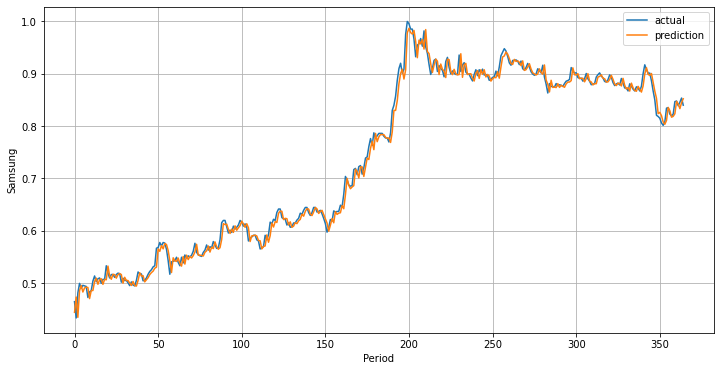

In [ ]:
import matplotlib.pyplot as plt

p = model.predict(x_test)

plt.figure(figsize=(12,6))
plt.ylabel('Samsung')
plt.xlabel('Period')
plt.plot(y_test, label='actual')
plt.plot(p, label='prediction')
plt.legend()
plt.grid()
plt.show()